In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

looking at how increasing the number of training samples can result in underfitting if the model was already
overfitted

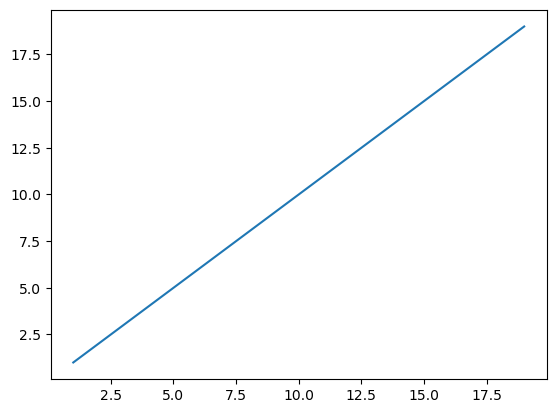

In [3]:
x = np.arange(1,20,1)
y = np.arange(1,20,1)
plt.plot(x, y)

In [4]:
#func to calc cost value
def caculate_cost(x, y, w, b, m): 

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
    Returns:
        J (scalar): cost value
    """
    
    J = 0
    for i in range(m):
        J += (w*x[i] + b - y[i])**2
    J /= (2*m)
    return J


#calc gradient
def calculate_gradient(x, y, w, b, i):

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        i (scalar): ith training sample
    Returns:
        dJ_dw (scalar): the gradient of cost wrt w
        dJ_db (scalar): the gradiene of cost wrt b
    """

    dJ_dw = 0
    dJ_db = 0

    dJ_dw += (w*x[i] + b - y[i])*x[i]
    dJ_db += (w*x[i] + b - y[i])

    return dJ_dw, dJ_db

#main algo
def linear_regr(x, y, w, b, m, a, e): 

    """
    Updates the values of w,b to find the best fit line
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
        a (scalar): learning rate
        e (scalar): number of epochs
    Returns:
        w (scalar): updated w
        b (scalar): updated b
        e_history (list): list of 1000th epoch
        cost_history (list): list of cost at every 1000th epoch
    """
    
    e_history = []
    cost_history = []

    for i in range(e):  #epoch iteration 
        for j in range(m): #dataset iteration
            dJ_dw, dJ_db = calculate_gradient(x, y, w, b, j)

            w -= a*dJ_dw
            b -= a*dJ_db

            J = caculate_cost(x, y, w, b, m)
            print(f"epoch: {i+1}, sample: {j+1}, Cost: {J}")
            e_history.append(j+1)
            cost_history.append(J) 

    return w, b, e_history, cost_history

In [5]:
w_init = 3
b_init = 0
w, b, e_hist, cost_hist = linear_regr(x, y, w_init, b_init, x.shape[0], 0.01, 1)
print(cost_hist)

epoch: 1, sample: 1, Cost: 254.43019999999999
epoch: 1, sample: 2, Cost: 233.81894497999997
epoch: 1, sample: 3, Cost: 192.960663077342
epoch: 1, sample: 4, Cost: 135.7738458415852
epoch: 1, sample: 5, Cost: 76.40468723338003
epoch: 1, sample: 6, Cost: 31.60630219986311
epoch: 1, sample: 7, Cost: 8.543833216814702
epoch: 1, sample: 8, Cost: 1.2835973940741563
epoch: 1, sample: 9, Cost: 0.10572274869447024
epoch: 1, sample: 10, Cost: 0.024609037157939006
epoch: 1, sample: 11, Cost: 0.0208118659383171
epoch: 1, sample: 12, Cost: 0.019403729358118835
epoch: 1, sample: 13, Cost: 0.019341566138244254
epoch: 1, sample: 14, Cost: 0.020012308252706314
epoch: 1, sample: 15, Cost: 0.021076872899610348
epoch: 1, sample: 16, Cost: 0.02241884289756933
epoch: 1, sample: 17, Cost: 0.023794202536963766
epoch: 1, sample: 18, Cost: 0.02545163809267125
epoch: 1, sample: 19, Cost: 0.02651613356581615
[254.43019999999999, 233.81894497999997, 192.960663077342, 135.7738458415852, 76.40468723338003, 31.606302

Text(0.5, 1.0, 'number of samples:20')

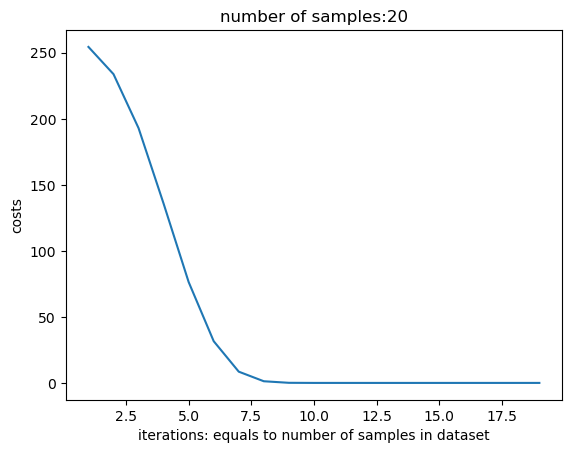

In [24]:
plt.plot(e_hist, cost_hist)
plt.xlabel('iterations: equals to number of samples in dataset')
plt.ylabel('costs')
plt.title('number of samples:20')

In [7]:
print(w,b)

1.0209533864233824 -0.40918589916811815


In [8]:
for i in range(19):
    print((w*x[i]+b-y[i])**2)
    print()

0.15072448395209137

0.1348939566313766

0.11994151811587714

0.10586716840559256

0.09267090750052343

0.08035273540066971

0.06891265210603063

0.05835065761660676

0.04866675193239808

0.03986093505340458

0.031933206979626275

0.024883567711063717

0.018712017247715717

0.013418555589582907

0.00900318273666529

0.005465898688962862

0.002806703446475625

0.0010255970092035785

0.00012257937714672275



In [9]:
#now since its a simple fit, basically a line, hence the model doesnt need many samples to fit, so overfitting can 
#occur very easily and also since we know that a solution to get rid of overfitting is to introduce more training
#samples, here we we increase the samples from 19 to say 30, huge amt of underfitting occurs where the cost increases
#rapidly, so its good to have a stopping point when the data we have is not very complex, where in this case its 
#just a line

In [19]:
x1 = np.arange(1,26,1)
y1 = np.arange(1,26,1)

In [20]:
w_init1 = 3
b_init1 = 0
w1, b1, e_hist1, cost_hist1 = linear_regr(x1, y1, w_init1, b_init1, x1.shape[0], 0.01, 1)
print(cost_hist1)

epoch: 1, sample: 1, Cost: 432.68960000000004
epoch: 1, sample: 2, Cost: 397.94269666
epoch: 1, sample: 3, Cost: 328.83092544397596
epoch: 1, sample: 4, Cost: 231.87757581218503
epoch: 1, sample: 5, Cost: 130.99141694532352
epoch: 1, sample: 6, Cost: 54.615367077993724
epoch: 1, sample: 7, Cost: 15.049279455180004
epoch: 1, sample: 8, Cost: 2.3952937586715786
epoch: 1, sample: 9, Cost: 0.23198862643892348
epoch: 1, sample: 10, Cost: 0.04970411800087038
epoch: 1, sample: 11, Cost: 0.03641783456521228
epoch: 1, sample: 12, Cost: 0.02848933976226918
epoch: 1, sample: 13, Cost: 0.02402508077959213
epoch: 1, sample: 14, Cost: 0.02145872254423166
epoch: 1, sample: 15, Cost: 0.02018313558429676
epoch: 1, sample: 16, Cost: 0.01970367194526568
epoch: 1, sample: 17, Cost: 0.019776738731129534
epoch: 1, sample: 18, Cost: 0.020284086681502625
epoch: 1, sample: 19, Cost: 0.020771163091654988
epoch: 1, sample: 20, Cost: 0.022579999175181564
epoch: 1, sample: 21, Cost: 0.020582822930367582
epoch: 1, 

Text(0.5, 1.0, 'number of samples: 25')

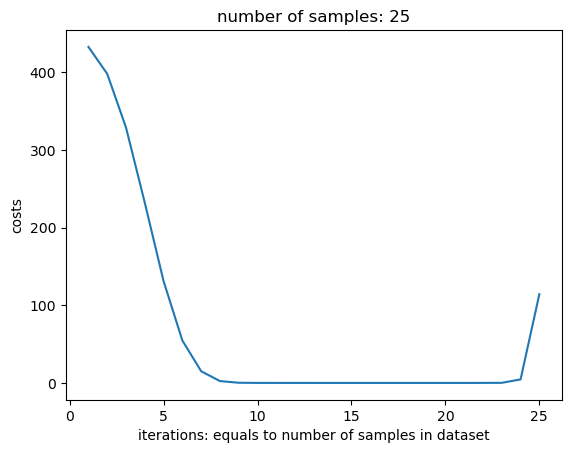

In [35]:
plt.plot(e_hist1, cost_hist1)
plt.xlabel('iterations: equals to number of samples in dataset')
plt.ylabel('costs')
plt.title('number of samples: 25')

In [34]:
#now we can see the cost inc as the number of samples increses 25
print(w1)

2.038488727358307


In [ ]:
#w*10_b shld be 10
print(w1*10 + b1)   #20, underfitting, which occurs in case of an already overfit model which now has been introduced
#to more training samples
print(w*10+b)   #9.8, closer indicating its the best fit

In [33]:
x = np.arange(1,25,1)
y = np.arange(1,25,1)

w = tf.Variable(3.0)  #letting the param be a tf Variable
b = tf.Variable(0.0)
alpha = 0.01

itereations = 24

for j in range(1):
    for i in range(itereations):
        with tf.GradientTape() as tape:  #instance of the GradientTape class has been created and named tape
            cost = (w*(x[i]) + b - y[i])**2   
        
        [dJdw, dbdw] = tape.gradient(cost, [w, b])   #the derivative

        w.assign_add(-alpha*dJdw)  #updation
        b.assign_add(-alpha*dbdw)
        print(cost)
        print()

print(w)

#same thing seen here where the cost increases after decrease, but done with tf

tf.Tensor(4.0, shape=(), dtype=float32)

tf.Tensor(15.0544, shape=(), dtype=float32)

tf.Tensor(28.056087, shape=(), dtype=float32)

tf.Tensor(32.76913, shape=(), dtype=float32)

tf.Tensor(23.108809, shape=(), dtype=float32)

tf.Tensor(8.155363, shape=(), dtype=float32)

tf.Tensor(0.89894533, shape=(), dtype=float32)

tf.Tensor(0.005313271, shape=(), dtype=float32)

tf.Tensor(0.0015493634, shape=(), dtype=float32)

tf.Tensor(0.00083819777, shape=(), dtype=float32)

tf.Tensor(0.00035429292, shape=(), dtype=float32)

tf.Tensor(0.0002927477, shape=(), dtype=float32)

tf.Tensor(5.7713947e-05, shape=(), dtype=float32)

tf.Tensor(0.0003959469, shape=(), dtype=float32)

tf.Tensor(0.0006729795, shape=(), dtype=float32)

tf.Tensor(0.017333975, shape=(), dtype=float32)

tf.Tensor(0.2990514, shape=(), dtype=float32)

tf.Tensor(7.8907704, shape=(), dtype=float32)

tf.Tensor(264.93738, shape=(), dtype=float32)

tf.Tensor(11433.155, shape=(), dtype=float32)

tf.Tensor(620994.9, shape=(), dtype=float